In [1]:
import os
import time
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm
from tqdm import tqdm
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt
import statsmodels.stats as stat
import sys
import scipy
#import pickle5 as pickle
tqdm.pandas(desc="my bars:")
warnings.filterwarnings("ignore")

In [61]:
#settings
work_path = os.path.dirname(os.getcwd())
current_time = time.strftime("%Y%m%d%H%M", time.localtime())
exp_name = 'strategy_test' #策略名
factor_file_path = work_path + '\\backtest\\strategy_file\\%s.csv' %exp_name #策略文件名，保存的三列名称为option_name,trade_time,position
exp_name = exp_name + '_'+ current_time
save_path = work_path + '\\backtest\%s' %exp_name

In [3]:
#ifind_data_format
pd.read_pickle(work_path + '\\03_data\\300etf_option2207.pkl')

,time,code,open,high,low,close,volume,option_code,type,maturity_date,strike
0,2022-05-26 09:35:00,10004299.SH,0.3987,0.3987,0.3987,0.3987,1.0,510300C2207M03600,1,2022-07-27 15:30:00,3.6
1,2022-05-26 09:35:00,10004300.SH,0.3146,0.3146,0.3025,0.3025,3.0,510300C2207M03700,1,2022-07-27 15:30:00,3.7
2,2022-05-26 09:35:00,10004301.SH,0.2454,0.2454,0.2317,0.2361,16.0,510300C2207M03800,1,2022-07-27 15:30:00,3.8
3,2022-05-26 09:35:00,10004302.SH,0.1808,0.1808,0.1645,0.1718,293.0,510300C2207M03900,1,2022-07-27 15:30:00,3.9
4,2022-05-26 09:35:00,10004303.SH,0.1227,0.1244,0.1158,0.1180,220.0,510300C2207M04000,1,2022-07-27 15:30:00,4.0
...,...,...,...,...,...,...,...,...,...,...,...
52699,2022-07-27 15:00:00,10004334.SH,0.4293,0.4293,0.4293,0.4293,0.0,510300P2207M04700,-1,2022-07-27 15:30:00,4.7
52700,2022-07-27 15:00:00,10004379.SH,0.0001,0.0001,0.0001,0.0001,9.0,510300C2207M04800,1,2022-07-27 15:30:00,4.8
52701,2022-07-27 15:00:00,10004380.SH,0.5287,0.5287,0.5287,0.5287,0.0,510300P2207M04800,-1,2022-07-27 15:30:00,4.8
52702,2022-07-27 15:00:00,10004391.SH,0.0001,0.0001,0.0001,0.0001,9.0,510300C2207M04900,1,2022-07-27 15:30:00,4.9


In [4]:
pd.read_csv(factor_file_path,index_col = 0)

,time,code,high,low,close,volume,option_code,type,maturity_date,strike price,time_to_mature,black Vol,sabr Vol,delta,gamma,vega,theta,signal,profit_position,hedge_position
0,2022-05-26 09:35:00,10004299.SH,0.3987,0.3987,0.3987,1.0,510300C2207M03600,C,2022-07-27 15:30:00,3.6,42.0,0.208851,0.206322,0.887525,0.572331,0.181374,-0.189641,0.012261,0.0,0.00000
1,2022-05-26 09:35:00,10004300.SH,0.3146,0.3025,0.3025,3.0,510300C2207M03700,C,2022-07-27 15:30:00,3.7,42.0,0.178065,0.204524,0.815075,0.804708,0.252510,-0.263158,-0.129369,1.5,0.00000
2,2022-05-26 09:35:00,10004301.SH,0.2454,0.2317,0.2361,16.0,510300C2207M03800,C,2022-07-27 15:30:00,3.8,42.0,0.199575,0.202778,0.720085,1.021566,0.317441,-0.329755,-0.015794,0.0,0.00000
3,2022-05-26 09:35:00,10004302.SH,0.1808,0.1645,0.1718,293.0,510300C2207M03900,C,2022-07-27 15:30:00,3.9,42.0,0.200190,0.201078,0.607321,1.174349,0.361402,-0.374213,-0.004417,0.0,0.00000
4,2022-05-26 09:35:00,10004303.SH,0.1244,0.1158,0.1180,220.0,510300C2207M04000,C,2022-07-27 15:30:00,4.0,42.0,0.198537,0.199424,0.485788,1.225768,0.373624,-0.385634,-0.004447,0.0,-3.15167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,2022-06-01 15:00:00,10004314.SH,0.2051,0.2043,0.2044,17.0,510300P2207M04200,P,2022-07-27 15:30:00,4.2,38.0,0.215650,0.220772,-0.618836,1.077879,0.345434,-0.442862,-0.023201,0.0,0.00000
4172,2022-06-01 15:00:00,10004315.SH,0.2755,0.2745,0.2750,24.0,510300P2207M04300,P,2022-07-27 15:30:00,4.3,38.0,0.218130,0.219733,-0.718630,0.954310,0.305832,-0.392089,-0.007293,0.0,0.00000
4173,2022-06-01 15:00:00,10004316.SH,0.3577,0.3547,0.3577,2.0,510300P2207M04400,P,2022-07-27 15:30:00,4.4,38.0,0.228410,0.218721,-0.802699,0.785345,0.251682,-0.322665,0.044299,0.0,0.00000
4174,2022-06-01 15:00:00,10004320.SH,0.4587,0.4587,0.4587,0.0,510300P2207M04500,P,2022-07-27 15:30:00,4.5,38.0,0.271441,0.217734,-0.868671,0.602526,0.193092,-0.247549,0.246661,0.0,0.00000


In [17]:
#preprocessing strategy data
position_data = pd.read_csv(factor_file_path,index_col = 0)
position_data['position'] = position_data.profit_position + position_data.hedge_position
position_data = position_data[['time','code','position']]
position_data.time = position_data.time.apply(lambda x:x[:-3])
position_data = position_data.rename(columns={'time':'trade_time','code':'option_name'})
position_data.trade_time = pd.to_datetime(position_data.trade_time)
position_data = position_data.fillna(0)

In [6]:
#strategy data_format
position_data

,trade_time,option_name,position
0,2022-05-26 09:35,10004299.SH,0.00000
1,2022-05-26 09:35,10004300.SH,1.50000
2,2022-05-26 09:35,10004301.SH,0.00000
3,2022-05-26 09:35,10004302.SH,0.00000
4,2022-05-26 09:35,10004303.SH,-3.15167
...,...,...,...
4171,2022-06-01 15:00,10004314.SH,0.00000
4172,2022-06-01 15:00,10004315.SH,0.00000
4173,2022-06-01 15:00,10004316.SH,0.00000
4174,2022-06-01 15:00,10004320.SH,0.00000


In [6]:
#position_data statistic metrics
position_data.position.describe()

count    4176.000000
mean       -0.733303
std        13.527403
min      -320.026437
25%         0.000000
50%         0.000000
75%         0.000000
max       211.077557
Name: position, dtype: float64

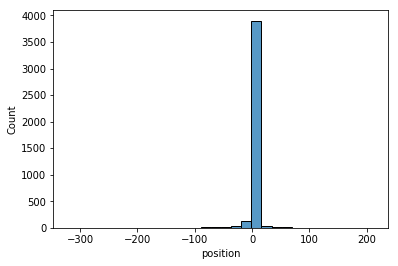

In [7]:
#position_data histplot
sns.histplot(position_data.position,bins=30)

In [8]:
def delete_singular_value(ts):
    max_singular = ts.rolling(100,min_periods = 100).quantile(0.99)
    min_singular = ts.rolling(100,min_periods = 100).quantile(0.01)
    ts[ts>max_singular] = 0
    ts[ts<min_singular] = 0
    return ts

position_data.position = position_data.groupby('option_name').apply(lambda x: delete_singular_value(x['position']))


In [21]:
def transaction_cost(position,transaction_cost_b = 0,transaction_cost_s = 0):
    if position>0:
        cost = position*transaction_cost_b
    else:
        cost = position*transaction_cost_s
    return cost


2022

In [52]:
#data_reprocessing for ifind data
data_ifind = pd.read_pickle(work_path + '\\03_data\\300etf_option2207.pkl')
data_etf = pd.read_pickle(work_path+'\\03_data\\300etf.pkl')
data_ifind = pd.merge(data_ifind,data_etf,how="outer")

data_ifind = data_ifind.rename(columns={'thscode':'option_name','time':'trade_time','code':'option_name','datetime':'trade_time'})

data_ifind = data_ifind.sort_values(['option_name','trade_time'])
data_ifind = data_ifind.groupby('option_name').apply(lambda x:x.sort_values(["trade_time",'option_name']))

data_ifind = pd.DataFrame(columns = data_ifind.columns,data = data_ifind.values)

data_ifind['buy_price'] = data_ifind.groupby('option_name').apply(lambda x:(x.close.shift(1))).values

data_ifind['ret'] = data_ifind.groupby(['option_name']).apply(lambda x:x.close.pct_change()).values

#position_data = pd.read_csv(factor_file_path,index_col = 0)

bk = pd.merge(position_data,data_ifind,how="left",on=["option_name","trade_time"])
bk['year'] = bk['trade_time'].apply(lambda x:x.year)
bk['month'] = bk['trade_time'].apply(lambda x:x.month)
bk['day'] = bk['trade_time'].apply(lambda x:x.day)
bk['position_diff'] = bk.groupby('option_name')['position'].diff().values
bk['trade_time'] = pd.to_datetime(bk['trade_time'])
bk = bk.dropna()
bk['transaction_direction'] = 'N'
bk['transaction_volume'] = 0
bk.loc[bk.position_diff>0,'transaction_direction'] = 'B'
bk.loc[(bk.position_diff<0) & (bk.position<0),'transaction_direction'] = 'S'
bk.loc[bk.position_diff>0,'transaction_volume'] = bk.position_diff
bk.loc[(bk.position_diff<0) & (bk.position<0) & (bk.position_diff>bk.position),'transaction_volume'] = abs(bk.position_diff)
bk.loc[(bk.position_diff<0) & (bk.position<0) & (bk.position_diff<bk.position),'transaction_volume'] = abs(bk.position)
bk[['close','ret']] = bk[['close','ret']].applymap(lambda x:float(x))

bk.head()

trade_time  option_name  position    open    high     low   close  \
19 2022-05-26 09:40:00  10004299.SH  0.000000    0.38    0.38    0.38  0.3800   
20 2022-05-26 09:40:00  10004300.SH  1.500000  0.2973  0.2973  0.2938  0.2938   
21 2022-05-26 09:40:00  10004301.SH  0.000000  0.2265  0.2265  0.2198  0.2209   
22 2022-05-26 09:40:00  10004302.SH  0.000000   0.168  0.1686  0.1588  0.1588   
23 2022-05-26 09:40:00  10004303.SH -3.369981  0.1177  0.1177  0.1076  0.1076   

    volume        option_code type       maturity_date strike buy_price  \
19     1.0  510300C2207M03600    1 2022-07-27 15:30:00    3.6    0.3987   
20     2.0  510300C2207M03700    1 2022-07-27 15:30:00    3.7    0.3025   
21    13.0  510300C2207M03800    1 2022-07-27 15:30:00    3.8    0.2361   
22   245.0  510300C2207M03900    1 2022-07-27 15:30:00    3.9    0.1718   
23  1202.0  510300C2207M04000    1 2022-07-27 15:30:00    4.0     0.118   

         ret  year  month  day  position_diff transaction_direction  \
19 -0.046902  2022      5   26       0.000000                     N   
20 -0.028760  2022      5   26       0.000000                     N   
21 -0.064380  2022      5   26       0.000000                     N   
22 -0.075669  2022      5   26       0.000000                     N   
23 -0.088136  2022      5   26      -0.218311                     S   
19     1.0  510300C2207M03600    1 2022-07-27 15:30:00    3.6    0.3898   
20     2.0  510300C2207M03700    1 2022-07-27 15:30:00    3.7    0.3898   
21    13.0  510300C2207M03800    1 2022-07-27 15:30:00    3.8    0.3898   
22   245.0  510300C2207M03900    1 2022-07-27 15:30:00    3.9    0.3898   
23  1202.0  510300C2207M04000    1 2022-07-27 15:30:00    4.0    0.3891   

         ret  year  month  day  position_diff transaction_direction  \
19  0.000000  2022      5   26       0.000000                     N   
20  0.000000  2022      5   26       0.000000                     N   
21  0.000000  2022      5   26       0.000000                     N   
22 -0.001796  2022      5   26       0.000000                     N   
23  0.039065  2022      5   26      -0.218311                     S   

    transaction_volume  
19            0.000000  
20            0.000000  
21            0.000000  
22            0.000000  
23            0.218311

In [59]:
def backtest(df,transaction_cost_b = 0,transaction_cost_s = 0,initial_capital = 10**6,Period = False):
    time_list = list(df['trade_time'].unique())
    time_list = sorted(time_list)
    backtest = {}
    pnl_tick = []
    ic = []
    pnl_capital = [initial_capital]
    tvr_tick = []
    gross_profit_tick = []
    net_profit_tick = []
    transactio_cost = {'B':transaction_cost_b,'S':transaction_cost_s,'N':0}
    for t in tqdm(time_list):
        sub_bk = df[df['trade_time']==t]
        ic.append(sub_bk[['position','ret']].corr().iloc[0,1])
        sub_bk['money_position'] = sub_bk['position']*sub_bk['buy_price']*10000
        sub_bk['transaction_cost'] = sub_bk['transaction_volume']*sub_bk['transaction_direction'].apply(lambda x:transactio_cost[x])
        sub_bk['net_profit'] = (sub_bk['money_position']*sub_bk['ret'] - sub_bk['transaction_cost'])
        sub_bk['gross_profit'] = sub_bk['money_position']*sub_bk['ret']
        pnl_tick.append((sub_bk['net_profit']/pnl_capital[-1]).sum())
        tvr_tick.append((sub_bk['money_position']/pnl_capital[-1]).sum())
        pnl_capital.append(pnl_capital[-1] + sub_bk['net_profit'].sum())
        gross_profit_tick.append(sub_bk['gross_profit'].sum())
        net_profit_tick.append(sub_bk['net_profit'].sum())
    ir = np.mean(ic)/np.std(ic)
    ic = np.mean(ic)
    temp_df = pd.Series(pnl_tick, index = time_list)
    gross_profit_df = pd.Series(gross_profit_tick,index = time_list)
    net_profit_df = pd.Series(net_profit_tick,index = time_list)
    pnl_capital = pd.Series(pnl_capital[1:],index=time_list)
    daily_ret = temp_df.resample('1d').sum()
    annual_ret = daily_ret.mean()*252
    annual_vol = daily_ret.std()*np.sqrt(252)
    
    pnl = temp_df.cumsum()
    maxdd = (pnl - pnl.cummax()).cummin()
    tvr = pd.Series(tvr_tick,index=time_list).sum()
    #win_rate =  df.groupby('trade_time').apply(lambda x:(x['position']*x['ret']>0).sum()/((x['position']!=0).sum()).mean()
    win_rate = df.groupby('trade_time').apply(lambda x:(x['position_diff'] * x['ret'] >0).sum()/((x['position_diff']!=0).sum())).mean()
    os.mkdir(save_path)
    backtest['long'] = df.loc[bk['position']>0,'position'].mean()
    backtest['short'] = df.loc[bk['position']<0,'position'].mean()
    backtest['ir'] = ir
    backtest['ic'] = ic
    backtest['SR'] = temp_df.mean()/temp_df.std()  #???
    backtest['Annualized_Ret'] = annual_ret
    backtest['Annualized_SR'] = annual_ret/annual_vol
    backtest['Net_Ret'] = temp_df.sum()
    backtest['Net_Profit'] = net_profit_df.sum()
    backtest['Gross_Profit'] = gross_profit_df.sum()
    backtest['maxdd'] = maxdd.iloc[-1]
    backtest['tvr'] = tvr
    backtest['win'] = win_rate
    pnl.index = pnl.index.strftime("%Y-%m-%d-%H:%M")
    pnl_capital.index = pnl_capital.index.strftime("%Y-%m-%d-%H:%M")
    maxdd.index = maxdd.index.strftime("%Y-%m-%d-%H:%M")
    res_ts = pd.DataFrame()
    res_ts['cumulative_return'] = pnl
    res_ts['cumulative_capital'] = pnl_capital
    res_ts['maxdd'] = maxdd
    if not Period:
        fig = res_ts.plot(figsize = (10,10),grid = True, subplots = True)
        fig[-1].figure.savefig(os.path.join(save_path, 'result.png'))
        pd.DataFrame(pd.Series(backtest),columns = ["value"]).to_csv(os.path.join(save_path, 'result.csv'))
        res_ts.to_csv(os.path.join(save_path, 'result_TimeSeries.csv'))
    else:
        fig = res_ts.plot(figsize = (10,10),grid = True, subplots = True)
        fig[-1].figure.savefig(os.path.join(save_path, f'{Period}_result.png'))
        res_ts.to_csv(os.path.join(save_path, 'result_TimeSeries.csv'))
    return backtest,res_ts
    
        
        
        
        

100%|████████████████████████████████████████████████████████████████████████████████| 239/239 [00:17<00:00, 13.95it/s]


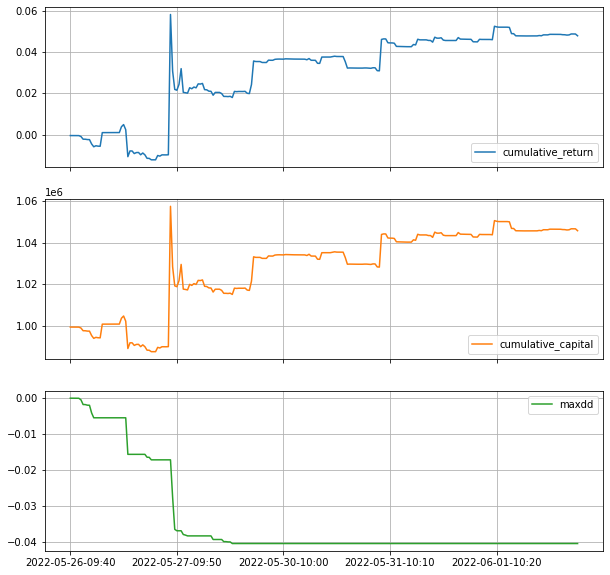

In [62]:
backtest_res,res_ts = backtest(bk,transaction_cost_b=1.5,transaction_cost_s=1.0,initial_capital=10**6)

In [89]:
#backtest by period, method = {"year","month"}
#can produce result grouped by period
def backtest_period(df,transaction_cost = 0,initial_capital = 10**6,method = 'year'):
    backtest_period = {}
    pnl_period = {}
    if method == "year":
        period_list = df[method].unique()
        backtest_res = df.groupby(method).apply(lambda x:backtest(x,transaction_cost,initial_capital,f"{x.trade_time.iloc[0].year}")[0])
    else:
        period_list = (df['year'] + df['month']).unique()
        backtest_res = df.groupby(["year",method]).apply(lambda x:backtest(x,transaction_cost,initial_capital,\
                                                                  f"{x.trade_time.iloc[0].year}_{x.trade_time.iloc[0].month}")[0])
    for period in period_list:
        if method =="year":
            backtest_period[period] = backtest_res[period]
        else:
            backtest_period[(period[:4],period[4:])] = backtest_res[(period[:4],period[4:])]
    pd.DataFrame(backtest_period).T.to_csv(os.path.join(save_path, f'result_{method}.csv'))
    return

100%|███████████████████████████████████████████████████████████████████████████████| 137/137 [00:00<00:00, 229.44it/s]


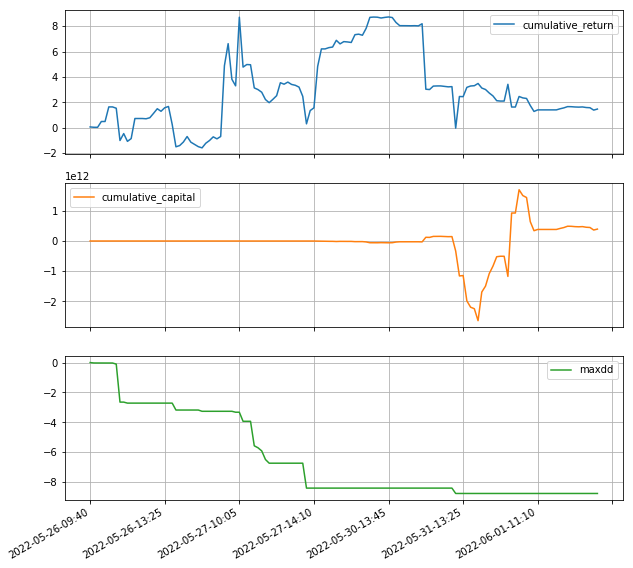

In [90]:
os.mkdir(save_path)
backtest_res,res_ts = backtest(bk,transaction_cost=0,initial_capital=10**6)

100%|███████████████████████████████████████████████████████████████████████████████| 816/816 [00:03<00:00, 243.72it/s]


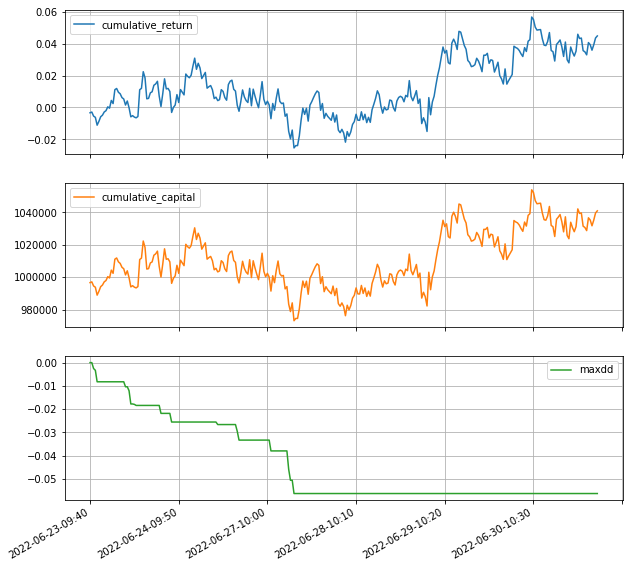

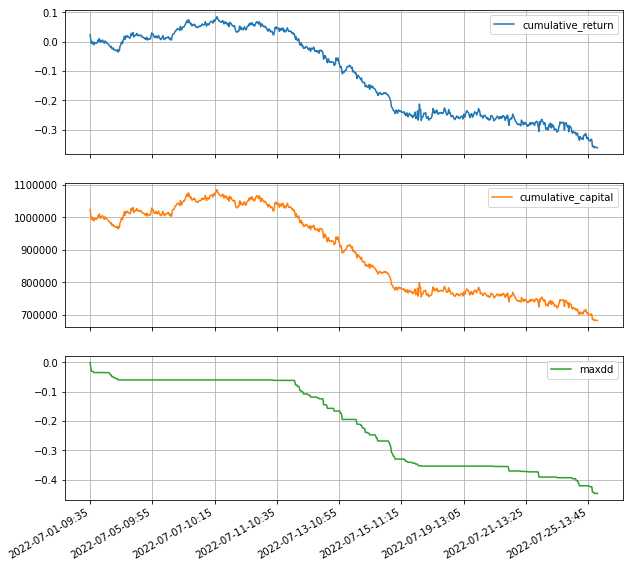

In [77]:
backtest_period(bk,transaction_cost=1.5,initial_capital=10**6,method = "month")

['C:\\Users\\lenovo\\git_intro\\SabrSummerProject2022\\backtest',
 'C:\\ProgramData\\Anaconda3\\python39.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin']